Fase 2: Data Understanding

Objetivo de la fase: El propósito de esta fase es explorar y entender el dataset de Goodreads, identificar posibles problemas como valores faltantes o anomalías, y comenzar a descubrir patrones iniciales que puedan influir en el análisis posterior. Además, se buscará evaluar la relación entre las variables clave (como el número de páginas, calificaciones y reseñas) para preparar el terreno de cara a las siguientes fases del proyecto.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kaggle
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Lo usaremos para el modelo de regresión
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.pipeline import Pipeline  # Aseguramos la importación de Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
csv_file_path = 'data/books.csv'

In [5]:
if not os.path.exists(csv_file_path):
    kaggle.api.dataset_download_files('jealousleopard/goodreadsbooks', path='data/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks


In [6]:
df = pd.read_csv(csv_file_path, delimiter=',', on_bad_lines='skip')

In [7]:
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [8]:
df.shape

(11123, 12)

In [9]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [10]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bookID,11123.0,2.131086e+04,1.309473e+04,1.000000e+00,1.027750e+04,2.028700e+04,3.210450e+04,4.564100e+04
average_rating,11123.0,3.934075e+00,3.504853e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.140000e+00,5.000000e+00
isbn13,11123.0,9.759880e+12,4.429758e+11,8.987060e+09,9.780345e+12,9.780582e+12,9.780872e+12,9.790008e+12
num_pages,11123.0,3.364056e+02,2.411526e+02,0.000000e+00,1.920000e+02,2.990000e+02,4.160000e+02,6.576000e+03
ratings_count,11123.0,1.794285e+04,1.124992e+05,0.000000e+00,1.040000e+02,7.450000e+02,5.000500e+03,4.597666e+06
text_reviews_count,11123.0,5.420481e+02,2.576620e+03,0.000000e+00,9.000000e+00,4.700000e+01,2.380000e+02,9.426500e+04


Matriz de Correlación

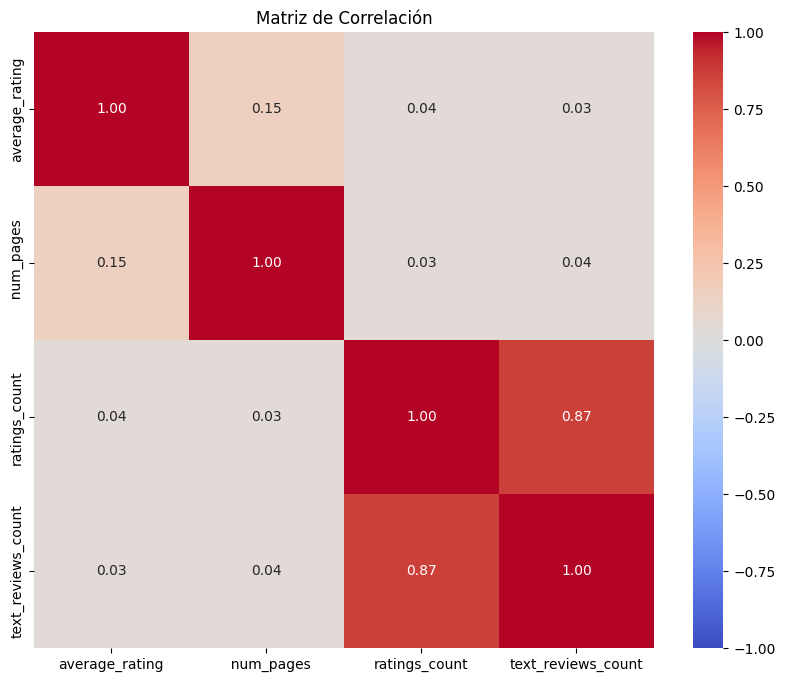

In [12]:
# Las columnas tienen que ser númericas
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['  num_pages'] = pd.to_numeric(df['  num_pages'], errors='coerce')
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')
df['text_reviews_count'] = pd.to_numeric(df['text_reviews_count'], errors='coerce')

# Calcula la matriz de correlación
correlation_matrix = df[['average_rating', '  num_pages', 'ratings_count', 'text_reviews_count']].corr()

# Crea el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Existe una correlación entre ratings_count y text_reviews_count, esto significa que un alto numero de calificaciones esta asociado con un alto numero de reseñas, los lectores al hacer una calificación tambien son propensos a escribir una reseña.

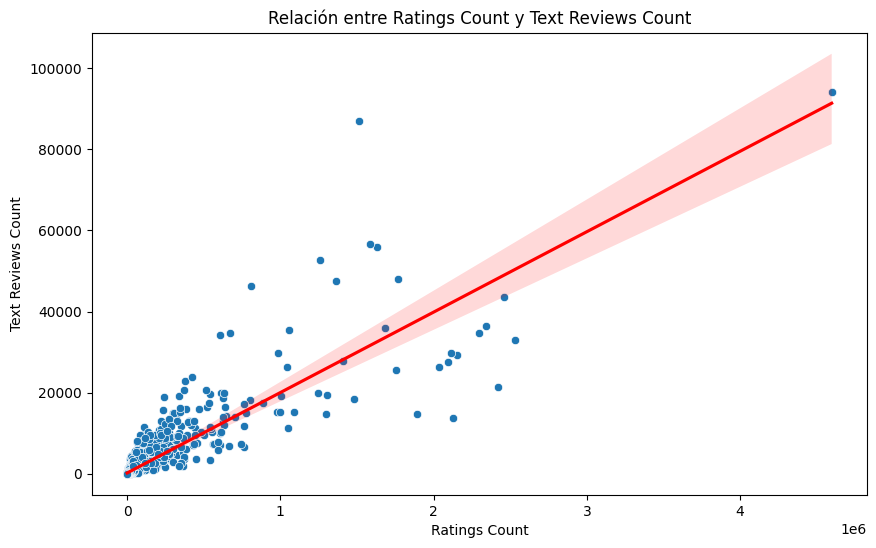

In [13]:
# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ratings_count', y='text_reviews_count', data=df)
sns.regplot(x='ratings_count', y='text_reviews_count', data=df, scatter=False, color='red')
plt.title('Relación entre Ratings Count y Text Reviews Count')
plt.xlabel('Ratings Count')
plt.ylabel('Text Reviews Count')
plt.show()

Se confirma la alta correlación con la linea roja y el area sombreada, indicando una tendencia positiva.

In [14]:
#Verificamos valores faltantes en el dataset
total_missing = df.isnull().sum().sum()
print(f'Total de valores faltantes: {total_missing}')

Total de valores faltantes: 0


Histograma: Distribución de clasificaciones promedio

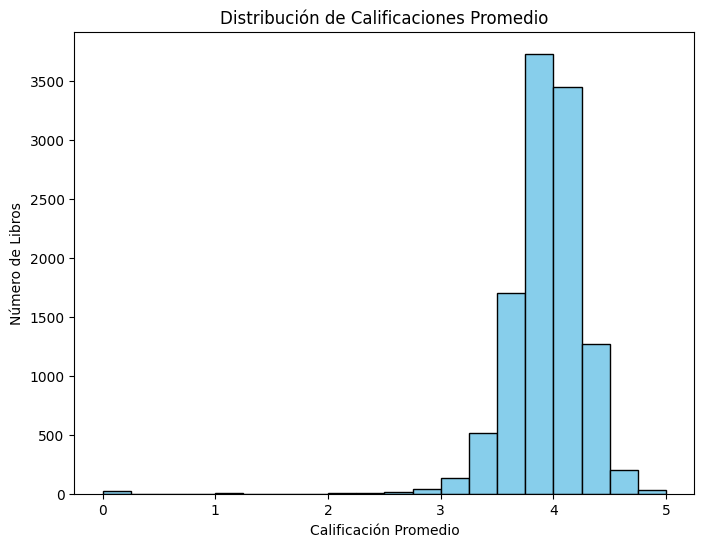

In [15]:
# Gráfico 1: Distribución de las calificaciones promedio (average_rating)
plt.figure(figsize=(8,6))
df['average_rating'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Calificaciones Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Número de Libros')
plt.grid(False)
plt.show()

La mayoria de los libros tienen una calificación promedio entre 3 a 4.5, lo que indica que el conjunto de libros esta bien valorado por los lectores.

Gráfico de dispersión

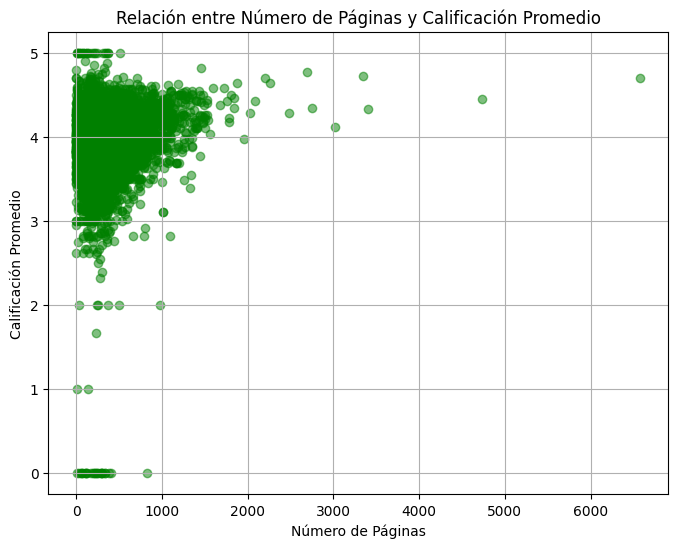

In [16]:
# Gráfico 2: Relación entre número de páginas y calificación promedio
plt.figure(figsize=(8,6))
plt.scatter(df['  num_pages'], df['average_rating'], alpha=0.5, color='green')
plt.title('Relación entre Número de Páginas y Calificación Promedio')
plt.xlabel('Número de Páginas')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()

La mayoria de cantidad de datos se encuentra entre 3 a 4.5 calificacion promedio y de menos de 1.500 numero de paginas.